In [56]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.datasets import load_wine

In [57]:
#Loading the wine data set from scikitlearn and showing what is in the columns

data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [58]:
#Splitting up the data for train test split to have training and test data

X_train, X_test, y_train, y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)

In [59]:
#calling the decision tree with a depth of 3 meaning it'll go to a max of three different options before choosing one and moving to the next node

clf = DecisionTreeClassifier(max_depth = 3, random_state = 0)

In [67]:
#fitting the data with the decision tree to learn the relationships between whats being used

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [68]:
#creating a new variable to test how the predictions from the training data work with the testing data

y_pred = clf.predict(X_test)

In [69]:
#this is having the model predict what type of wine there is from the first 10 entries in the dataset

clf.predict(X_test[0:10])

array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1])

In [63]:
#Checking what the accuracy is of the testing set with the training set 

score = clf.score(X_test, y_test)
print(score)

0.9333333333333333


In [70]:
# creating a classification report to check accuracy and taking other variable results to see how useful the model is on prediciting.

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.91      0.95      0.93        21
           2       0.89      1.00      0.94         8

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



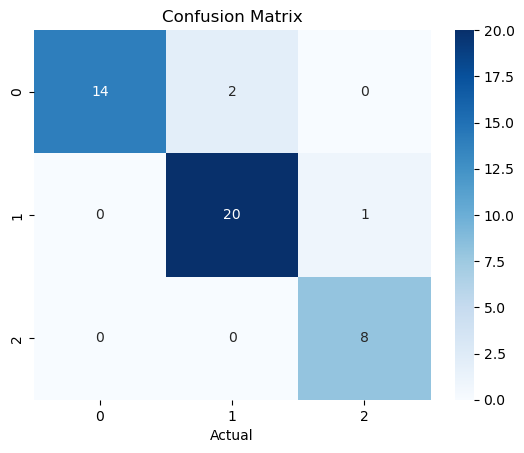

In [66]:
#A heat map to visualize where the model went wrong and possibly figure out how to fix it and make the model more accurate 

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()